# Import and read file

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
from IPython.display import display
from tabulate import tabulate
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

# -1 ?
# 0 X
# 1 within done
# 2 ✅ 
# 3 -

## Read file

In [18]:
df = pd.read_csv('Habits.csv')

# display(list(df.columns))

In [ ]:
for col in df.columns:
    globals()[col.replace(" ", "_")] = df[col]
print([var for var in df.columns])

['Date', 'Opportunites Searching', 'Pomodores', 'Wake up', 'Wake up time', 'Morning Water', 'Morning teeth brush', 'First Meal', 'First meal teeth brush', 'Second Meal', 'Second Meal teeth brush', 'Third Meal', 'Third Meal teeth brush', 'Last teeth brush', 'Going sleep', 'Going sleep time', 'Reach out', 'Exercise reminder', 'Sort Towels', 'Sort Dishes', 'Brush teeth', 'Eat', 'Vitamin after first meal', 'Meeting Reminder', 'Wake up before 10', 'Sleep before 2330', 'Forms filling', 'Walk Fili', 'Laundry Up/Down', 'Sleep', 'Certificate', 'Pray/Meditate', 'Planning', 'Bed', 'Room', 'Email sort', 'Clothes fold', 'Alcohol', 'French', 'Beard Shave', 'Shower', 'Streak', 'Laundry', 'Haircut', 'Nail clip', 'Daily Photo', 'Left Hand', 'Groceries', 'Reading', 'Journaling', 'Wordle', 'Typing', '4x4', '5x5', 'MegaMix', 'Mirror Cube', 'Other Languages', 'Coding', 'Mental Exercise', 'Tiktok Notes', 'Instagram Notes', 'Notebooks notes', 'Other Notes', 'Coffee', 'Album Database', 'Songs Database', 'Film

0      2025-01-03
1      2025-01-02
2      2025-01-01
3      2024-12-31
4      2024-12-30
          ...    
728    2023-01-06
729    2023-01-05
730    2023-01-04
731    2023-01-03
732    2023-01-02
Name: Date, Length: 733, dtype: object

# Wake Up

In [ ]:
# Create WakeUpTime column
df['WakeUpTime'] = (df['Wake up'] / 10).astype(int)

# Keep only values where WakeUpTime > 0
WakeUpDateAndTime = df[df['WakeUpTime'] > 0][['Date', 'WakeUpTime']]

#print graph object of wake up time
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=WakeUpTime['Date'], y=WakeUpTime['WakeUpTime'], mode='lines+markers'))
# fig.update_layout(title='Wake up time', xaxis_title='Date', yaxis_title='Time')
# fig.show()

# Ensure 'Date' is in datetime format
WakeUpDateAndTime["Date"] = pd.to_datetime(WakeUpDateAndTime["Date"])

# Convert WakeUpTime to HH:MM format
WakeUpDateAndTime["WakeUpTime_str"] = WakeUpDateAndTime["WakeUpTime"].astype(str).str.zfill(4)  # Ensure 4-digit format (e.g., '0830', '1215')

# Create a new datetime column
WakeUpDateTime = pd.to_datetime(WakeUpDateAndTime["Date"].astype(str) + " " + 
                                WakeUpDateAndTime["WakeUpTime_str"].str[:2] + ":" + 
                                WakeUpDateAndTime["WakeUpTime_str"].str[2:], format="%Y-%m-%d %H:%M")

# TODO: create a function that does this to all the other times in order to be able to make calculations among them

0     2025-01-03 08:30:00
1     2025-01-02 07:45:00
2     2025-01-01 12:15:00
3     2024-12-31 12:30:00
4     2024-12-30 10:15:00
              ...        
266   2024-04-12 11:45:00
267   2024-04-11 11:00:00
268   2024-04-10 13:00:00
269   2024-04-09 13:30:00
270   2024-04-08 08:30:00
Length: 251, dtype: datetime64[ns]

## Plot of Wake up vs Date
It shows not much about it yet

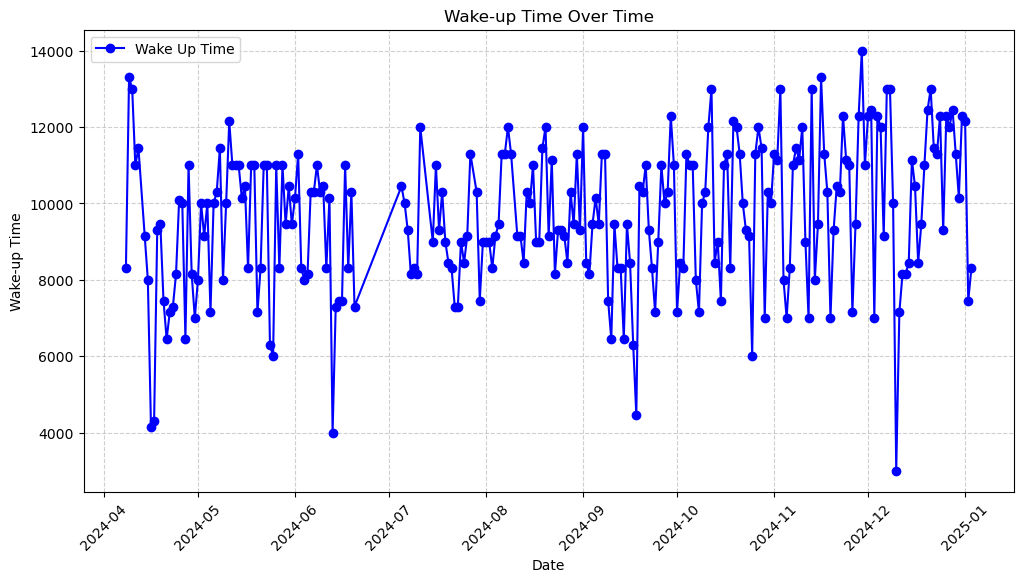

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df_filtered = df[df['Wake up'] > 3]


plt.figure(figsize=(12, 6))  # Adjust figure size
plt.plot(df_filtered['Date'], df_filtered['Wake up'], marker='o', linestyle='-', color='b', label='Wake Up Time')

# Add grid, title, labels, and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Wake-up Time')
plt.title('Wake-up Time Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()

# Show the plot
plt.show()

## With Graph Objects

In [11]:
# Generate example data
x = df_filtered['Date']
y = df_filtered['Wake up']

# Create interactive figure
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x, y=y,
    mode='lines+markers',
    marker=dict(size=6),
    name="Wake up",
    hoverinfo="x+y"  # Display X and Y on hover
))

# Show the figure
fig.show()

## Gaussian Distribution of Wake up 
It shows that the data follows a normal distribution

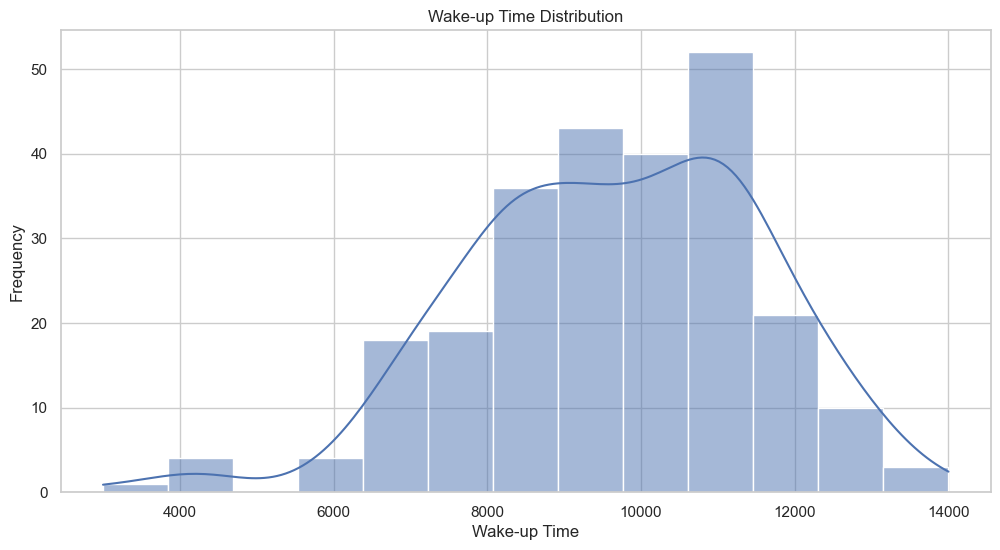

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['Wake up'], kde=True, color='b')
plt.title('Wake-up Time Distribution')
plt.xlabel('Wake-up Time')
plt.ylabel('Frequency')
plt.show()